Azure Notebook  Climate Change Analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

Import Data

In [5]:
yearsBase, meanBase = np.loadtxt('5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

Create a Scatter Plot

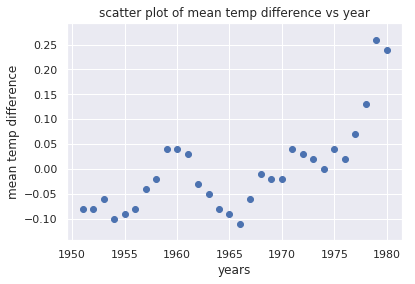

In [6]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

The data set you loaded uses a 30-year mean between 1951 and 1980 to calculate a base temperature for that period, and then uses 5-year mean temperatures to calculate the difference between the 5-year mean and the 30-year mean for each year. The scatter plot shows the annual temperature differences.

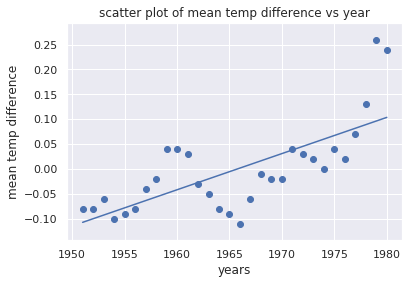

 y = 0.007279199110122221 * x + -14.309265850945222


In [7]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

From the regression line, you can see that the difference between 30-year mean temperatures and 5-year mean temperatures is increasing over time. Most of the computational work required to generate the regression line was done by NumPy's polyfit function, which computed the values of m and b in the equation y = mx + b.

Another popular Python library that is widely used in the research community is scikit-learn, which excels at building machine-learning models to help extract information from data. In this exercise, you will use scikit-learn (which was already imported in Unit 2) to compute a trend line for the NASA climate data.

Place the cursor in the empty cell at the bottom of the notebook. Change the cell type to Markdown and enter "Perform linear regression with scikit-learn" as the text.

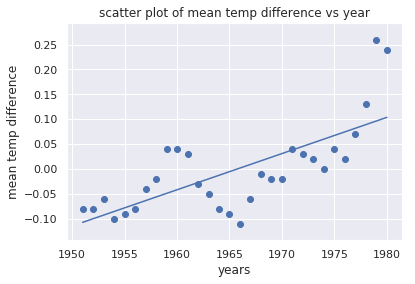

 y = 0.007279199110122357 * x + -14.309265850945492


In [8]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

Scatter plot with regression line computed by sckikit-learn

The output is almost identical to the output in the previous exercise. The difference is that scikit-learn did more of the work for you. Specifically, you didn't have to code a line function as you did with NumPy; scikit-learn's LinearRegression function did it for you. scikit-learn supports many different types of regression, which comes in handy when building sophisticated machine-learning models.

Perform linear regression with Seaborn

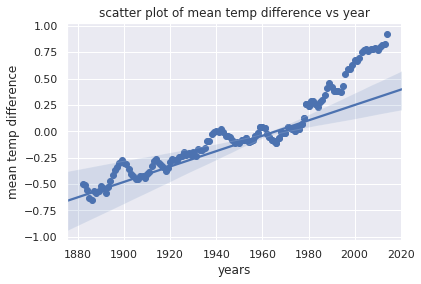

In [10]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()

Run the code cell to produce a scatter chart with a regression line and a visual representation of the range in which the data points are expected to fall. (ABOVE)

Comparison of actual values and predicted values generated with Seaborn

Notice how the data points for the first 100 years conform nicely to the predicted values, but the data points from roughly 1980 forward don't. It's models such as these that lead scientists to believe that climate change is accelerating.